# Project 0: Inaugural

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np

from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

In [3]:
# Question 1

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [11]:
# Functions used to solve the problem

# Utility function
def u_func(c,l,v,eps):
    utility = np.log(c)-v*(l**(1+(1/eps))/(1+(1/eps)))
    return utility

# Total resources
def total_resources(m,w,l,tax0,tax1,k):
    x = m+w*l-(tax0*w*l + (tax1*np.max(w*l-k,0)))
    return x
 
 
# Print solution 
def print_solution(c,l,utility):
    print(f'c = {c:.8f}')
    print(f'l = {l:.8f}')
    print(f'u  = {utility:.8f}')

#Set parameters
m = 1
v = 10
eps = 0.3
tax0 = 0.4
tax1 = 0.1
k = 0.4
w = 0.75

#Value of choice
def value_of_choice(l,m,w,tax0,tax1,k,eps,v):
    c =  total_resources(m,w,l,tax0,tax1,k)
    return -u_func(c,l,v,eps)


# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))

# c. unpack solution
l = sol_case1.x
c = total_resources(m,w,l,tax0,tax1,k)
utility = u_func(c,l,v,eps)
print_solution(c,l,utility)

c = 1.17347486
l = 0.35593295
u  = 0.13372067


# Question 2

ADD ANSWER.

Text(0,0.5,'$l$')

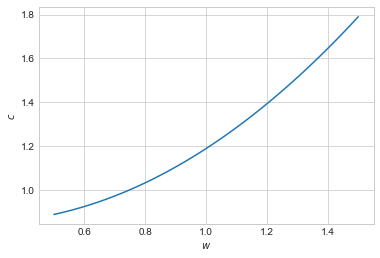

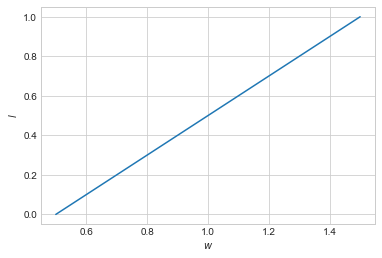

In [6]:
# Values
w_vec = np.linspace(0.5,1.5,100)
l_values = np.linspace(0,1,100)
c_values_alt = total_resources(m,w_vec,l_values,tax0,tax1,k)

#Consumption plot
fig_c = plt.figure()
ax = fig_c.add_subplot(1,1,1)
ax.plot(w_vec,c_values_alt)

# a. Add labels
ax.set_xlabel('$w$')
ax.set_ylabel('$c$')

#Labor plot
fig_l = plt.figure()
ax2 = fig_l.add_subplot(1,1,1)
ax2.plot(w_vec, l_values)

# a. Add labels
ax2.set_xlabel('$w$')
ax2.set_ylabel('$l$')


# Question 3

ADD ANSWER.

In [21]:
N = 10000
np.random.seed(888)
w = np.random.uniform(0.5,1.5, size =N)

for i in w:
    l = sol_case1.x
    tax_i = tax0*w*l+tax1*np.max(w*l-k,0)
    
total_tax = np.sum(tax_i)
print(total_tax)

1708.7753835090189


# Question 4

ADD ANSWER.

In [87]:
N = 10000
np.random.seed(888)
w = np.random.uniform(0.5,1.5, size =N)

for i in w:
    #Set parameters
    m = 1
    v = 10
    eps = 0.1
    tax0 = 0.4
    tax1 = 0.1
    k = 0.4
    
    #Value of choice
    def value_of_choice(l,m,i,tax0,tax1,k,eps,v):
        c =  total_resources(m,i,l,tax0,tax1,k)
        return -u_func(c,l,v,eps)
        
    # b. call solver
    sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',
    bounds=(0,1),args=(m,i,tax0,tax1,k,eps,v))

    l = sol_case1.x
    tax_i = tax0*w*l+tax1*np.max(w*l-k,0)
    
total_tax = np.sum(tax_i)
print(total_tax)

3623.2067092630477


# Question 5

ADD ANSWER.

In [88]:

# a. objective function (to minimize)
def value_of_choice(x,w):
    # note: x is a vector
    tax0 = x[0]
    tax1 = x[1]
    k = x[2]
    l = x[3]
    return -total_tax

# b. constraints (violated if negative) and bounds
constraints = ({'type': 'ineq', 'fun': lambda x: c-(m+w*x[3]-(x[0]*w*x[3] + (x[1]*np.max(w*x[3]-x[2],0))))}) 
bounds = ((0,1),(0,1),(0,1),(0,1))

# c. call solver
initial_guess = [0.4,0.1,0.4,0.3]
sol_case2 = optimize.minimize(
    value_of_choice,initial_guess,args=(i),
    method='SLSQP',bounds=bounds,constraints=constraints)

# Print solution 
def print_solution1(tax0,tax1,k,l):
    print(f'tax0 = {tax0:.8f}')
    print(f'tax1 = {tax1:.8f}')
    print(f'k  = {k:.8f}')
    print(f'l  = {l:.8f}')



# d. unpack solution
tax0 = sol_case2.x[0]
tax1 = sol_case2.x[1]
k = sol_case2.x[2]
l = sol_case2.x[3]
print_solution1(tax0,tax1,k,l)

tax0 = 0.45753101
tax1 = 0.10507434
k  = 0.38677616
l  = 0.20246931


# Conclusion

ADD CONCISE CONLUSION.